# matpltlib显示图像范例

In [146]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

from mylibs.show_images import show_images

## 显示一张图像

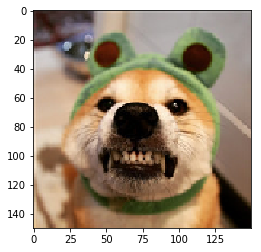

In [149]:
#根据图像文件路径显示文件
img_file='%s/data/1.jpg'%(os.getenv('HOME'))           #图像路径
img = image.load_img(img_file, target_size=(150, 150)) #加载图像
plt.imshow(img)
plt.show()

## 改变图像大小

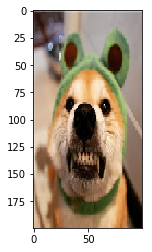

In [150]:
img=img.resize((100,200))
plt.imshow(img)
plt.show()

## 显示单张随机生成的图像

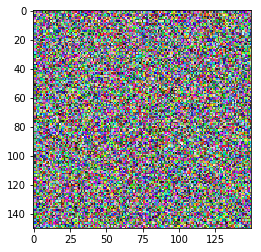

In [151]:
#显示随机生成的图像
img=image.array_to_img(np.random.randint(0,266,size=(150,150,3)))
plt.imshow(img)
plt.show()                      

## 显示单张随机生成的图像

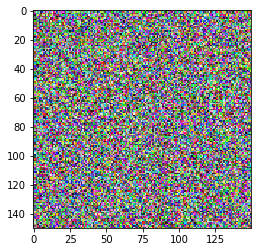

In [153]:
#显示随机生成的图像
img=np.random.random(size=(150,150,3))
plt.imshow(img)
plt.show() 

## 显示多张图像

In [154]:
#显示多张图像
def show_imagesa(images,grids=(16,16),grid_size=(150,150),margin=1,fig_size=(10,10)):
    '''显示多张图像
    @param images    图像序列 np.narray,[batch_size,width,height,channels]
            支持两种数据类型：
            np.ndarray ----[batch_size,width,height,channels],dtype=np.int8
            list ----------[文件列表]，如:['a.jpg','b.jpg','c.jpg']
    @param grids     图像网格 (rows,cols)
    @param gird_size 网格大小 (img_height,img_width)
    @param marign    图像间隙
    '''
    #初始化图像网格[rows{height} x cols{width}]
    rows,cols=grids                #图像网格数  (rows,cols)
    height,width=grid_size         #图像网格大小(img_height,img_width)
    display_grid = np.zeros((rows*height+(rows-1)*margin, cols * width+(cols-1)*margin,3))  #初始化图像
    if type(images)==np.ndarray:
        num_of_images=images.shape[0]  #图像数目
    else:
        num_of_images=len(images)
    row=0 #当前行
    col=0 #当前列
    for index in range(num_of_images):
        row=index // cols                  #当前行
        col=index - row*cols               #当前列
        if type(images)==np.ndarray:
            img=np.resize(images[index,:],(height,width,3))
        else:
            img=image.load_img(images[index], target_size=grid_size) #加载图像
            img=image.img_to_array(img)/255
        row_start=row*height+row*margin
        row_end=row_start+height
        col_start=col*width+col*margin
        col_end=col_start+width
        
        display_grid[row_start : row_end,col_start:col_end] = img
        
    plt.figure(figsize=(12, #width ,英寸
                        12))#height,英寸
    plt.grid(True)
    #plt.imshow(display_grid, aspect='auto', cmap='viridis')    
    plt.imshow(display_grid,aspect='auto')
    
    plt.show()    

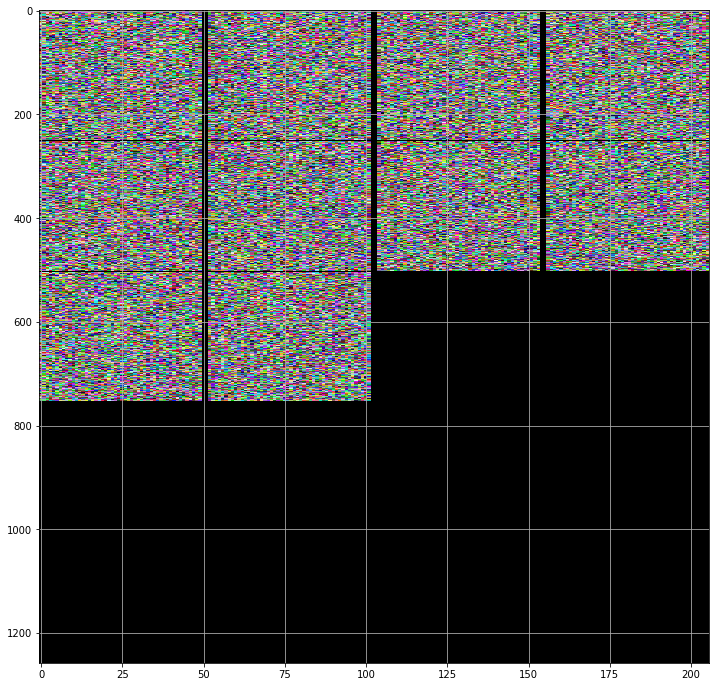

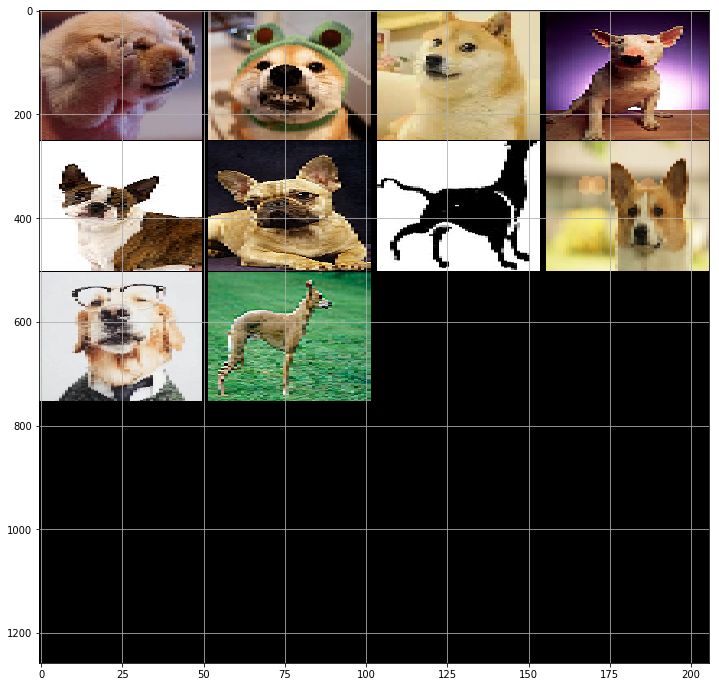

In [155]:
grids=(5,4)
grid_size=(250,50)
margin=2

images=np.random.random((10,150,150,3))
show_images(images,grids,grid_size,margin)

images_file=['%s/data/images/%d.jpg'%(os.getenv('HOME'),i) for i in range(10) ]
show_images(images_file,grids,grid_size,margin)

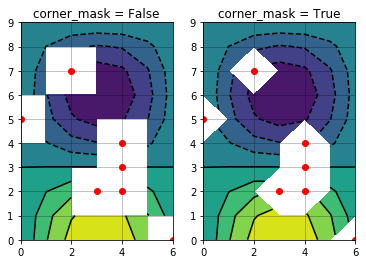

In [157]:
import matplotlib.pyplot as plt
import numpy as np

# Data to plot.
x, y = np.meshgrid(np.arange(7), np.arange(10))
z = np.sin(0.5 * x) * np.cos(0.52 * y)

# Mask various z values.
mask = np.zeros_like(z, dtype=bool)
mask[2, 3:5] = True
mask[3:5, 4] = True
mask[7, 2] = True
mask[5, 0] = True
mask[0, 6] = True
z = np.ma.array(z, mask=mask)

corner_masks = [False, True]
fig, axs = plt.subplots(ncols=2)
for ax, corner_mask in zip(axs, corner_masks):
    cs = ax.contourf(x, y, z, corner_mask=corner_mask)
    ax.contour(cs, colors='k')
    ax.set_title('corner_mask = {0}'.format(corner_mask))

    # Plot grid.
    ax.grid(c='k', ls='-', alpha=0.3)

    # Indicate masked points with red circles.
    ax.plot(np.ma.array(x, mask=~mask), y, 'ro')

plt.show()